# *Exploring TTC Streetcar Delays and Forecasting Delays*

- Created on: November, 2023
- Created by: Jessica Seo
---------

## 🚂 Decision Tree Modelling

### Notebook Contents

- [Introduction](#introID)
- [Categorical Feature Definition](#categoricalID)
- [Data Loading](#loadingID)
- [Decision Tree Model](#modelID)
    - Hyperparameter Tuning
    - Model Evaluation 
- [Summary](#summaryID)
-------

## <a id='introID'> Introduction </a>

Given the categorical nature of our target feature, we will use a Decision Tree model to explore whether this advanced approach improves performance.

### <a id='categoricalID'> Categorical Feature Definition </a>

<table>
   <tr>
    <th style="text-align: left; background: lightgrey">Summer/Winter_PT</th>
    <th style="text-align: left; background: lightgrey">Definition</th>
  </tr>
  <tr>
    <td style="text-align: left"> <code>0</code> </td>
    <td style="text-align: left">No, There wasn't a Temperature warning</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>1</code></td>
    <td style="text-align: left">Yes, There was a Temperature warning</td>
    <tr>
    <th style="text-align: left; background: lightgrey">Day</th>
    <th style="text-align: left; background: lightgrey">Definition</th>
  </tr>
  <tr>
    <td style="text-align: left"> <code>0</code> </td>
    <td style="text-align: left">Monday</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>1</code></td>
    <td style="text-align: left">Tuesday</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>2</code></td>
    <td style="text-align: left">Wednesday</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>3</code></td>
    <td style="text-align: left">Thursday</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>4</code></td>
    <td style="text-align: left">Friady</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>5</code></td>
    <td style="text-align: left">Saturday</td>
  </tr>
    <tr>
    <td style="text-align: left"><code>6</code></td>
    <td style="text-align: left">Sunday</td>
  </tr>
    <tr>
    <th style="text-align: left; background: lightgrey">Min_Delay</th>
    <th style="text-align: left; background: lightgrey">Definition</th>
  </tr>
  <tr>
    <td style="text-align: left"><code>0(Slight Delay)</code></td>
    <td style="text-align: left">0 Minute to 6 Minutes Delay</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>1(Moderate Delay)</code></td>
    <td style="text-align: left">7 Minutes to 9 Minutes Delay</td>
  </tr>
  <tr>
  <tr>
    <td style="text-align: left"><code>2(Severe Delay)</code></td>
    <td style="text-align: left">Greater than 10 Minutes Delay</td>
  </tr>
</table>


----
## <a id='loadingID'> Data Loading</a>

In [1]:
#importing necessary python library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'pandas'

In [ ]:
#importing modelling library
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report,accuracy_score
from sklearn.tree import plot_tree

In [ ]:
#ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#loading merged datasest
df=pd.read_csv('train_test_model.csv')
df

,Temperature,Precipitation,Summer_PT,Winter_PT,Day,Line,Min_Delay,Year,Month,Date,...,Incident_Late,Incident_Late Entering Service,Incident_Late Leaving Garage,Incident_Management,Incident_Mechanical,Incident_Operations,Incident_Overhead,Incident_Rail/Switches,Incident_Security,Incident_Utilized Off Route
0,-2.0,0.0,False,True,4,501,2,2021,1,1,...,0,0,0,0,0,1,0,0,0,0
1,-2.0,0.0,False,True,4,504,2,2021,1,1,...,0,0,0,0,0,1,0,0,0,0
2,-1.4,0.0,False,True,4,504,2,2021,1,1,...,0,0,0,0,0,0,0,0,0,0
3,-1.4,0.0,False,True,4,504,2,2021,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0.4,0.0,False,False,4,506,2,2021,1,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41619,16.6,0.0,False,False,5,511,2,2023,9,30,...,0,0,0,0,0,0,0,0,0,0
41620,16.9,0.0,False,False,5,505,2,2023,9,30,...,0,0,0,0,0,0,0,0,1,0
41621,16.9,0.0,False,False,5,513,2,2023,9,30,...,0,0,0,0,0,1,0,0,0,0
41622,16.9,0.0,False,False,5,501,2,2023,9,30,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def basic_exploration(df):
    '''
    Basic EDA function
    '''
    print(f"Rows: {df.shape[0]}")
    print(f"Columns: {df.shape[1]}")
    print(f"Missing values: {df.isna().sum().sum()}")
    print(f"Duplicated rows: {df.duplicated().sum()}")

basic_exploration(df)

Rows: 41624
Columns: 39
Missing values: 0
Duplicated rows: 0


##  <a id='modelID'> Decision Tree Model </a>

In [ ]:
#Spliting

X=df.drop('Min_Delay', axis=1)
y=df['Min_Delay']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3 ,random_state=101 )

In [ ]:
#Instantiate the model
DT_train = DecisionTreeClassifier(random_state=45)

#Fit the model
DT_train.fit(X_train, y_train)

#Score the model
DT_train_baseline = DT_train.score(X_train, y_train)
DT_test_baseline = DT_train.score(X_test, y_test)

# Training and test score
print(f"DT Train score: {DT_train_baseline}")
print(f"DT Test score: {DT_test_baseline}")

DT Train score: 0.9990733113673805
DT Test score: 0.5541319666880204


Overfitting occurs when the model captures noise in the training data, causing it to perform poorly on new, unseen data (test set). The noticeable difference between the training score and the test score indicates that the model is highly overfitting. We should refit the model after tuning the best hyperparameters.

### Hyperparameter Tuning

In [ ]:
#Finding the best depth
train_acc = []
test_acc = []

depth_range = range(1,50)

for depth in depth_range:
    
    #Instantiate the DT
    
    dt_train = DecisionTreeClassifier(max_depth=depth)
    
    # Fit
    
    dt_train.fit(X_train, y_train)
    
    # Scores
    
    train_acc.append(dt_train.score(X_train, y_train))
    test_acc.append(dt_train.score(X_test, y_test))

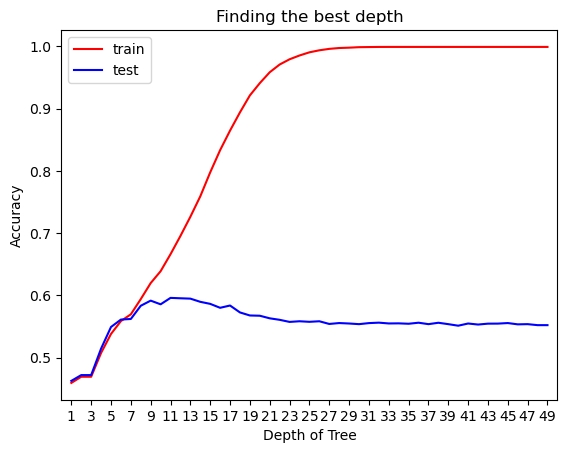

In [ ]:
#visualizing the depth range 
plt.figure()

plt.plot(depth_range, train_acc, c= 'red', label = 'train')
plt.plot(depth_range, test_acc, c= 'blue', label = 'test')

plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy')
plt.title('Finding the best depth')

plt.xticks(range(1,50,2))
plt.xlim(0,50)

plt.legend()

plt.show()

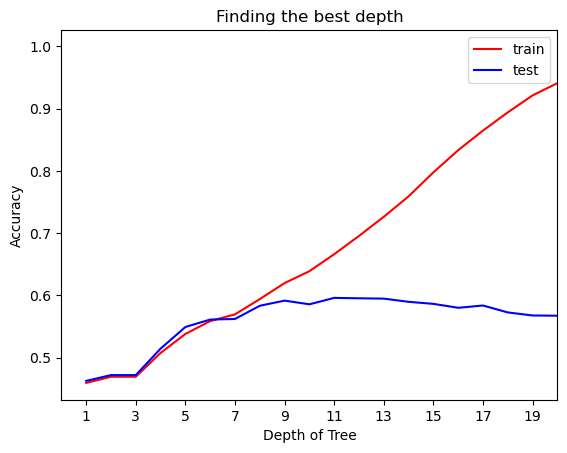

In [ ]:
#let's narrow down the range
plt.figure()

plt.plot(depth_range, train_acc, c= 'red', label = 'train')
plt.plot(depth_range, test_acc, c= 'blue', label = 'test')

plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy')
plt.title('Finding the best depth')

plt.xticks(range(1,20,2))
plt.xlim(0,20)

plt.legend()

plt.show()

The plot suggests that the optimal `max_depth` value is likely 8 or 9.

In [ ]:
#testing out the best max_depth values

#Instantiate the model
depth_train = DecisionTreeClassifier(max_depth=8)

#Fit the model
depth_train.fit(X_train, y_train)

#Score the model
depth_train_baseline = depth_train.score(X_train, y_train)
depth_test_baseline = depth_train.score(X_test, y_test)

# Training and test score
print(f"DT Train score: {depth_train_baseline}")
print(f"DT Test score: {depth_test_baseline}")

DT Train score: 0.5938701263042284
DT Test score: 0.5831197950032031


Nice! Optimizing the Max_Depth value regularized the model as we hoped. Next, let's find the best `min_samples_leaf` value. The parameter determines the minimum number of sampled data points which again prevents the tree from becoming overly complex leading to regularization.

In [ ]:
dt_pm = DecisionTreeClassifier(random_state=101)

params = {'max_depth':[7,8,9],
          'min_samples_leaf':[1,15,30,45],
          'min_samples_split':[1,15,30,45],
          'criterion':['gini','entropy']}

GS = GridSearchCV(estimator=dt_pm,param_grid=params,cv=5,n_jobs=-1, verbose=True, scoring='accuracy')

In [ ]:
#fitting the gridsearch
GS.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 8, 9],
                         'min_samples_leaf': [1, 15, 30, 45],
                         'min_samples_split': [1, 15, 30, 45]},
             scoring='accuracy', verbose=True)

In [ ]:
print('Best Parameters:',GS.best_params_,end='\n\n')
print('Best Score:',GS.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 30, 'min_samples_split': 15}

Best Score: 0.5901292164761136


In [ ]:
#second iteration
dt_pm = DecisionTreeClassifier(random_state=101)

params = {'max_depth':[9],
          'min_samples_leaf':[25,30,35],
          'min_samples_split':[10,15,20],
          'criterion':['gini']}

GS2 = GridSearchCV(estimator=dt_pm,param_grid=params,cv=5,n_jobs=-1, verbose=True, scoring='accuracy')

In [ ]:
#fitting the second gridsearch
GS2.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [9],
                         'min_samples_leaf': [25, 30, 35],
                         'min_samples_split': [10, 15, 20]},
             scoring='accuracy', verbose=True)

In [ ]:
#second
print('Best Parameters:',GS2.best_params_,end='\n\n')
print('Best Score:',GS2.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 25, 'min_samples_split': 10}

Best Score: 0.5905067692476942


In [ ]:
#third iteration
dt_pm = DecisionTreeClassifier(random_state=101)

params = {'max_depth':[9],
          'min_samples_leaf':[18,20,22,25,27,29],
          'min_samples_split':[1,2,4,6,8,10,12],
          'criterion':['gini']}

GS3 = GridSearchCV(estimator=dt_pm,param_grid=params,cv=5,n_jobs=-1, verbose=True, scoring='accuracy')

In [ ]:
#fitting the second gridsearch
GS3.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [9],
                         'min_samples_leaf': [18, 20, 22, 25, 27, 29],
                         'min_samples_split': [1, 2, 4, 6, 8, 10, 12]},
             scoring='accuracy', verbose=True)

In [ ]:
#third
print('Best Parameters:',GS3.best_params_,end='\n\n')
print('Best Score:',GS3.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 27, 'min_samples_split': 2}

Best Score: 0.5906440729432803


In [ ]:
#Instantiate the model
decision_tree_model = DecisionTreeClassifier(criterion= 'gini',max_depth=9, min_samples_leaf=27,min_samples_split=2)

#Fit the model
decision_tree_model.fit(X_train, y_train)

#Predicting the model
y_train_pred = decision_tree_model.predict(X_train)
y_test_pred = decision_tree_model.predict(X_test)

#finding the accuracy
train_accuracy= accuracy_score(y_train, y_train_pred)
test_accuracy= accuracy_score(y_test, y_test_pred)

#accuracy 
print(f"Best DT train accuracy: {train_accuracy}")
print(f"Best DT test accuracy: {test_accuracy}")

Best DT train accuracy: 0.609383580450302
Best DT test accuracy: 0.5934497117232543


Compared to the baseline accuracy, where the model predicted 55%, the optimized model achieves a higher accuracy of 59% and does not exhibit overfitting. The trained model demonstrates improved predictions with unseen data. 

In [ ]:
#let's visualize the tree we just created

feature_list = ['Temperature', 'Precipitation', 'Summer_PT', 'Winter_PT', 'Visibility',
       'Day', 'Line', 'Year', 'Month', 'Date', 'Hour', 'Minute',
       'Weather_Cloudy', 'Weather_Fog', 'Weather_Freezing Rain',
       'Weather_Haze', 'Weather_Heavy Rain', 'Weather_Heavy Snow',
       'Weather_Moderate Rain', 'Weather_Moderate Snow', 'Weather_Rain',
       'Weather_Snow', 'Weather_Thunderstorms',
       'Incident_Collision - TTC Involved', 'Incident_Diversion',
       'Incident_Emergency Services', 'Incident_General Delay',
       'Incident_Held By', 'Incident_Investigation', 'Incident_Late',
       'Incident_Late Entering Service', 'Incident_Late Leaving Garage',
       'Incident_Management', 'Incident_Mechanical', 'Incident_Operations',
       'Incident_Overhead', 'Incident_Rail/Switches', 'Incident_Security',
       'Incident_Utilized Off Route']

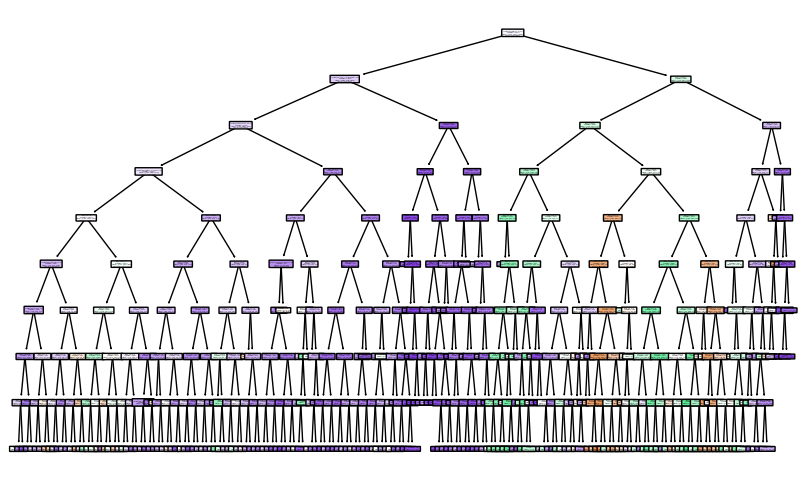

In [ ]:
plt.figure(figsize=(10, 6))
plot_tree(decision_tree_model, 
          feature_names=feature_list, 
          class_names=["Slight Delay", "Moderate Delay", "Severe Delay"],
          rounded=True,
          impurity=False,
          filled=True)
plt.show()

In [ ]:
#looking at the best correlation features
# Get feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': decision_tree_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

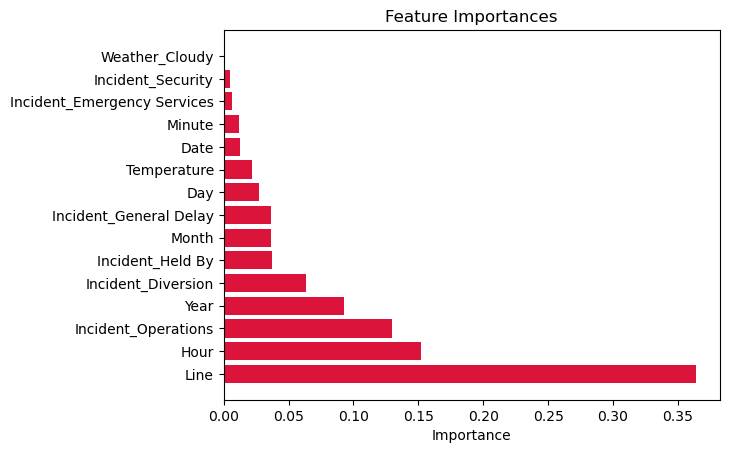

In [ ]:
# Plot the feature importances
plt.figure()
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='crimson')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

In [ ]:
feature_importances

,Feature,Importance
5,Line,0.363872
9,Hour,0.152367
33,Incident_Operations,0.129737
6,Year,0.093003
23,Incident_Diversion,0.063532
26,Incident_Held By,0.037104
7,Month,0.036701
25,Incident_General Delay,0.036507
4,Day,0.027329
0,Temperature,0.021628


It appears that the `Line` feature has the highest importance in predicting streetcar delays, as indicated by the decision tree model. Following Line, the features `Hour, Incident Reason, and Year` displays significant influence. Initially, our purpose was to explore the relationship between streetcar delays and weather. However, it seems that the `Temperature` feature shows a very weak correlation, specifically 0.022.

### Model Evaluation

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.44      0.52      3376
           1       0.56      0.69      0.62      4523
           2       0.62      0.61      0.62      4589

    accuracy                           0.59     12488
   macro avg       0.60      0.58      0.58     12488
weighted avg       0.60      0.59      0.59     12488



Confusion Matrix:


,Predicted-Slight Delay,Predicted-Moderate Delay,Predicted-Severe Delay
True-Slight Delay,1494,1143,739
True-Moderate Delay,449,3105,969
True-Severe Delay,464,1313,2812


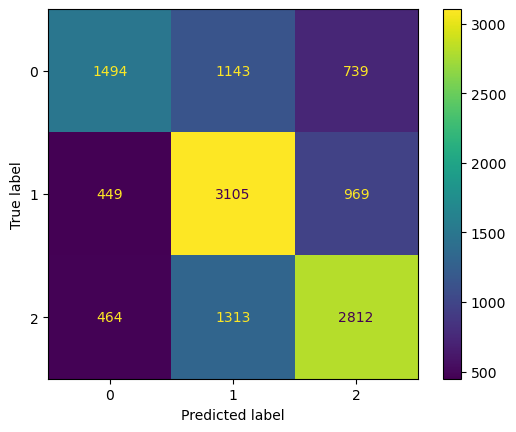

In [ ]:
#Confusion Matrix
#Get class predictions
y_pred = decision_tree_model.predict(X_test)

# Generate confusion matrix
df_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
df = pd.DataFrame(
    df_matrix, 
    columns = ["Predicted-Slight Delay","Predicted-Moderate Delay", "Predicted-Severe Delay"],
    index = ["True-Slight Delay","True-Moderate Delay", "True-Severe Delay"]
)


from sklearn.metrics import classification_report
# the function expects the estimator, inputs and target as parameters
ConfusionMatrixDisplay.from_estimator(decision_tree_model, X_test, y_test);

classification_report = classification_report(y_test, y_test_pred)
print('Classification Report:')
print(classification_report)

print('\n')
print('Confusion Matrix:')
display(df)

- It appears that the `Slight Delay` class **correctly predicted True Positives** (approximately 1500 indices) and True Negatives (approximately 450 indices). The confusion matrix suggests that the model can identify slight delays well.  
<br> 

- Both the `Slight Delay and Severe Delay` classes show a **62% accuracy in predicting True Positives**. The 'Severe Delay' class also correctly identifies instances of 'Slight Delay' by looking at the count of True Negatives.    
<br>
- However, the `Moderate Delay` class seems to be **quite imbalanced, with a precision score of 56% and a high count of True Negatives**. This means that the model finds it difficult to correctly identify instances of this class.  

---- 
## <a id='summaryID'> Summary </a>

Previously, the logistic regression model achieved a 44% accuracy in predicting streetcar delays. After regularization in the decision tree model, the accuracy significantly improved to 59%, with the most influential features being Line, Time, and Incident. Let's look deeper into exploration and continue building advanced models to further enhance prediction accuracy in the next notebook.

## <a id='modelsaveID'> Model Saving </a>

In [ ]:
from joblib import dump, load

# Save the model
dump(decision_tree_model, 'best_decision_tree.joblib')

['best_decision_tree.joblib']